In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import mplcyberpunk
import numpy as np
import pysynphot

import astropy.units as u
from astropy.modeling import models, fitting
from astropy.visualization import quantity_support

from specutils.spectra.spectrum1d import Spectrum1D
from specutils.fitting.continuum import fit_continuum, fit_generic_continuum
from specutils.manipulation import FluxConservingResampler
from specutils.spectra import SpectralRegion
from specutils.manipulation import extract_region
quantity_support()
plt.style.use("cyberpunk")

In [2]:
def load_pysyn_spectrum(fitsfile):
    hdul = fits.open(fitsfile)
    h = hdul[0].header
    counts = hdul[0].data[2][0] / h['EXPTIME']
    w = h['CRVAL1'] + h['CDELT1'] * np.arange(len(counts))
    sp = pysynphot.ArraySpectrum(w, counts, waveunits="angstrom", fluxunits='counts')
    sp.convert('abmag')
    return sp

def load_spectrum1d(fitsfile):
    pspec = load_pysyn_spectrum(fitsfile)
    pspec.convert('count')
    sp = Spectrum1D(spectral_axis=pspec.wave * u.angstrom, flux=pspec.flux * u.count/u.second)
    return sp

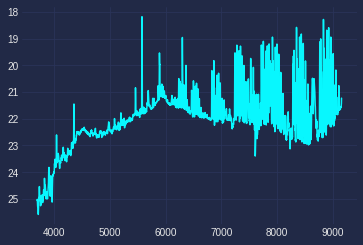

In [4]:
s = load_pysyn_spectrum("2020.1013/skysub_hecto_2/skydir/061.sky.ms.fits")
plt.plot(s.wave, s.flux)
plt.gca().invert_yaxis()
#mplcyberpunk.make_lines_glow()
plt.show()

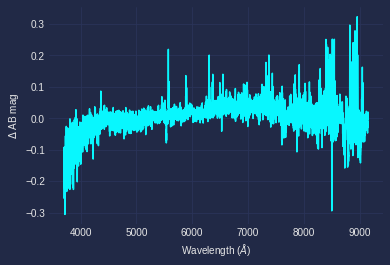

In [5]:
#s2 = load_pysyn_spectrum("2004.1119/skysub_sdss2.041031.late_9/skydir/200.sky.ms.fits")
s2 = load_pysyn_spectrum("2020.1013/skysub_hecto_2/skydir/296.sky.ms.fits")
old_flux = s2.sample(s.wave)
diff = old_flux - s.flux
plt.plot(s.wave, diff)
plt.ylabel("$\Delta$ AB mag")
plt.xlabel("Wavelength ($\AA$)")
plt.savefig("hecto_2004_2020.png")
plt.show()

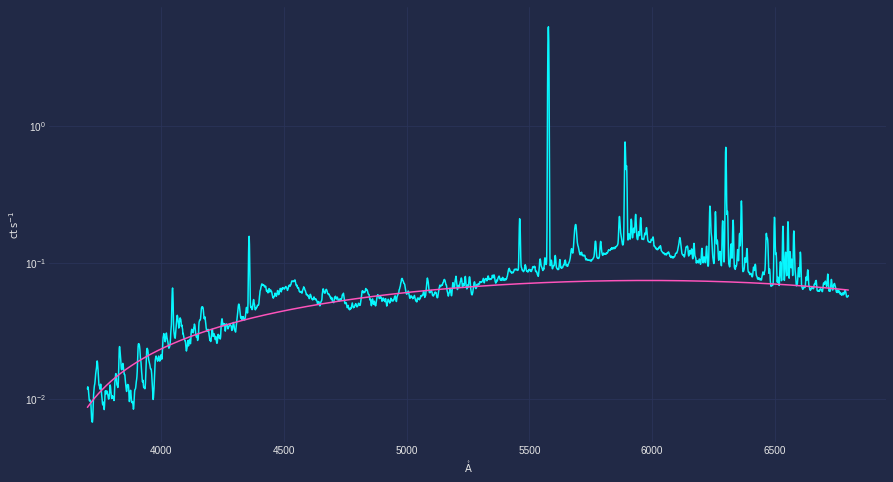

In [8]:
#pspec = load_spectrum1d("2004.1119/skysub_sdss2.041031.late_9/skydir/200.sky.ms.fits")
#pspec = load_spectrum1d("2020.1013/skysub_hecto_2/skydir/061.sky.ms.fits")
#pspec = load_spectrum1d("2017.0420/skysub_A1767a17_3/skydir/200.sky.ms.fits")
pspec = Spectrum1D.read("./2020.1013/skysub_m31_pne_20_9_comb.fits")
sr = SpectralRegion(pspec.spectral_axis.min(), 6800 * u.angstrom)
spec = extract_region(pspec, sr)
cont_regions = [
    (pspec.spectral_axis.min(), 4250*u.angstrom), 
    (4800*u.angstrom, 5300*u.angstrom),
    (6700*u.angstrom, 6800*u.angstrom)
]
fit = fit_continuum(spec, model=models.Chebyshev1D(3), window=cont_regions)
#plt.rc('font', size=16)
plt.figure(figsize=[15,8])
plt.yscale('log')
plt.plot(spec.spectral_axis, spec.flux)
plt.plot(spec.spectral_axis, fit(spec.spectral_axis))
plt.show()

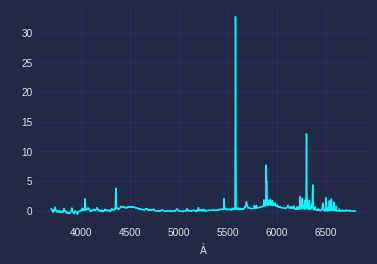

In [15]:
cont = fit(spec.spectral_axis)
ew = (spec.flux - cont) / cont
plt.plot(spec.spectral_axis, ew)
#plt.yscale('log')
plt.show()